# **IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# **Read Dataset**

In [38]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [39]:
df = df.drop('Loan_ID', axis=1)

In [40]:
#Checking the data types of columns
df.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [41]:
#let’s have a look if the data has missing values or not:
df.isnull().sum()

,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11
Credit_History,30


In [42]:
#let’s have a look at the descriptive statistics of the dataset before filling in the missing values:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [43]:
# fill in the missing values.
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


In [44]:
# Fill missing values in numerical column
#We can fill in the missing values of the loan amount column with the median value.
#The median is an appropriate measure to fill in missing values when dealing with skewed distributions or when outliers are present in the data.
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

#We can fill in the missing values of the credit history column with the mode value.
#Since credit history is a binary variable (0 or 1), the mode represents the most common value and is an appropriate choice for filling in missing values.
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)



# **Data Exploration and Visualization**

In [45]:
fig_gender=px.histogram(df,x='Gender',title='Gender Distribution',color_discrete_sequence = ['darkseagreen'])
fig_gender.show()

## *Distribution of the Martial Status*

In [14]:
married_count = df['Married'].value_counts()
fig_married = px.bar(married_count,
                     x=married_count.index,
                     y=married_count.values,
                     title='Marital Status Distribution')
fig_married.update_traces(marker_color = 'navy',
                  marker_line_width = 2, opacity = 1)
fig_married.show()

## *Distribution of the Self-employment*

In [15]:
self_employed_count = df['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count,
                           x=self_employed_count.index,
                           y=self_employed_count.values,
                           title='Self-Employment Distribution')
fig_self_employed.update_traces(marker_color = 'navy',
                  marker_line_width = 2, opacity = 1)
fig_self_employed.show()

##*Education Distribution*

In [16]:
fig_education=px.histogram(df,x='Education',title='Education Distribution',color_discrete_sequence = ['darkseagreen'])

fig_education.show()

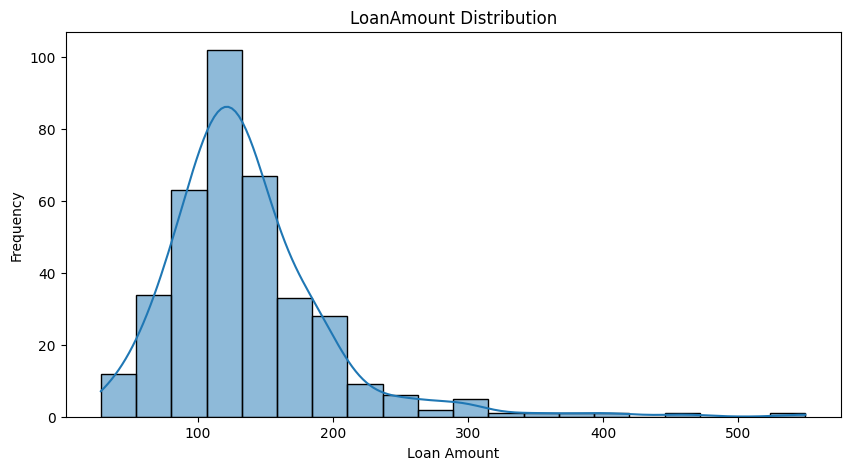

In [17]:

df['LoanAmount'] = pd.to_numeric(df['LoanAmount'], errors='coerce')
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='LoanAmount', bins=20, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('LoanAmount Distribution')
plt.show()

# **Data Preparation**

In [46]:

#Convert categorical Columns into numerical ones
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']
for i in col_to_encode:
    df[i] = le.fit_transform(df[i])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [47]:
# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols] = scaler.transform(df[numerical_cols])

In [48]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,-2.524165,-0.546329,-3.678312,-5.051178,-1.208232,0,0
1,1,1,0,0,1,-2.524952,-0.546605,-3.755610,-5.051178,-1.208232,2,1
2,1,1,0,1,0,-2.525159,-0.546173,-3.688286,-5.051178,-1.208232,2,1
3,1,0,0,0,0,-2.523460,-0.546605,-3.662105,-5.051178,-1.208232,2,1
4,1,1,0,1,0,-2.525284,-0.546327,-3.719455,-5.051178,-1.208232,2,1


In [50]:


X_train = X_train.drop(columns=['Loan_ID'], errors='ignore')
X_test = X_test.drop(columns=['Loan_ID'], errors='ignore')




In [56]:
from sklearn.impute import SimpleImputer

# Create the imputer — here we fill numerical values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform training data
X_train = imputer.fit_transform(X_train)

# Transform test data using the same imputer (important!)
X_test = imputer.transform(X_test)


# **Model Building and Evaluation**

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_report_svc = classification_report(y_test, y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("\nSVC:")
print("Accuracy: ", accuracy_svc)
print("\nClassification Report: ", classification_report_svc)
print("\nConfusion Matrix: \n", confusion_matrix_svc)



SVC:
Accuracy:  0.808695652173913

Classification Report:                precision    recall  f1-score   support

           0       0.93      0.40      0.56        35
           1       0.79      0.99      0.88        80

    accuracy                           0.81       115
   macro avg       0.86      0.69      0.72       115
weighted avg       0.83      0.81      0.78       115


Confusion Matrix: 
 [[14 21]
 [ 1 79]]
